# <p style="padding:10px;background-color:#2b2d42;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">House Price on Divar</p>

<p style="text-align:center; ">
<img src="https://media.cntraveler.com/photos/6124643cc9e624849c7a44bd/16:9/w_1920,c_limit/LICENSE_Mehrdad-Mzadeh-Tehran_(c)-Getty-Images_CNT-UK_Sophie-Knight.jpg">

<div style=" width: 100%; background: #8d99ae; padding: 20px 0; color: #fff; font: sans-serif; border-radius: 15px;">
    <h3 style="font-size: 20; font-weight: 400; text-align:center ">اعضای گروه</h3>
    <ul style="width: 50%; direction: rtl; ">
        <li>بهداد خسرویانی</li>
        <li>مهریار محرابی</li>
        <li>علی گرگانی</li>
        <li>علیرضا آقامحمدی</li>
    </ul>
</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   


    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#0f4c5c"> Importing Libraries</font>](#1)                   |8   | [<font color="#0f4c5c"> Address</font>](#8)   |     
|2   | [<font color="#0f4c5c"> Importing Dataset</font>](#2)                         |9  | [<font color="#0f4c5c"> Visualization</font>](#9)|      
|3   | [<font color="#0f4c5c"> PreProcessing</font>](#3)                     |10  | [<font color="#0f4c5c">Modeling</font>](#10)   |    
|4   | [<font color="#0f4c5c"> Room</font>](#4)                             
|5   | [<font color="#0f4c5c"> Parking</font>](#5)           
|6   | [<font color="#0f4c5c"> Warehouse</font>](#6)                  
|7   | [<font color="#0f4c5c"> Elevator</font>](#7)              

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>   


In [63]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.stats import diagnostic as dg
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Importing DataSet</p>   


In [64]:
df = pd.read_csv('apartments-sells.csv')

In [65]:
df.head() # returning 5 first row of dataframe

,Title,Neighborhood,Area,Construction,Rooms,Price,Per_Price,Floor,Elevator,Parking,Warehouse
0,260 متر تکواحدی 24 متری,سعادت‌آباد,260,1400,4,56000000000,215384000,5,دارد,دارد,دارد
1,آپارتمان 59متر سازمان آب,حکیمیه,59,1399,1,4425000000,75000000,5 از 5,دارد,دارد,دارد
2,147متر 3خواب فلکه اول تهرانپارس 2پارکینگه فول,تهرانپارس غربی,147,1397,3,13000000000,88435000,3 از 5,دارد,دارد,دارد
3,آپارتمان فروشی قیطریه 80متری 2دو خوابه اطراف پارک,قیطریه,80,1384,2,8500000000,106250000,1 از 5,دارد,دارد,دارد
4,فروش آپارتمان 52 متر بریانک(فکرش را هم نمیکنید),بریانک,52,1385,1,2280000000,43846000,3 از 4,ندارد,ندارد,دارد


In [66]:
df.info() # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71830 entries, 0 to 71829
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         71830 non-null  object
 1   Neighborhood  71830 non-null  object
 2   Area          71830 non-null  int64 
 3   Construction  71830 non-null  object
 4   Rooms         71830 non-null  int64 
 5   Price         71830 non-null  int64 
 6   Per_Price     71830 non-null  int64 
 7   Floor         71830 non-null  object
 8   Elevator      71830 non-null  object
 9   Parking       71830 non-null  object
 10  Warehouse     71830 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.0+ MB


In [67]:
df.rename(columns = str.lower,inplace = True)
df.columns # changing the column names to lower letters to access easily

Index(['title', 'neighborhood', 'area', 'construction', 'rooms', 'price',
       'per_price', 'floor', 'elevator', 'parking', 'warehouse'],
      dtype='object')

In [68]:
print('rows:   ',df.shape[0])
print('columns:   ',df.shape[1])

rows:    71830
columns:    11


In [69]:
df.isnull().sum()  # counting nulls in dataframe

title           0
neighborhood    0
area            0
construction    0
rooms           0
price           0
per_price       0
floor           0
elevator        0
parking         0
warehouse       0
dtype: int64

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">PreProcessing</p>   


In [70]:
print("there is",df.duplicated().sum(),"duplicates in data") # cheking duplicates

there is 21 duplicates in data


In [71]:
df[df.duplicated()] # handeling duplicate data

,title,neighborhood,area,construction,rooms,price,per_price,floor,elevator,parking,warehouse
9980,77متر آپارتمان خوش نقشه و کم واحد درشهرزیبا,شهر زیبا,77,1383,2,5650000000,73376000,همکف از 4,ندارد,دارد,دارد
17257,145 متر سه خواب دو پارکینگ سندی بنی فاطمه,هروی,145,1390,3,18000000000,124137000,1,دارد,دارد,دارد
20860,118 متر 2 خواب / ونک / شیراز / شیخ بهایی,ونک,118,1387,2,15700000000,133050000,1 از 4,ندارد,دارد,دارد
25778,آپارتمان 150 متری شهرک غرب 8 واحدی,شهرک غرب,150,1377,3,21500000000,143333000,2 از 4,دارد,دارد,دارد
36801,آپارتمان91متری/تکواحدی/خوش نقشه,پرستار,91,1387,2,4800000000,52747000,3 از 4,ندارد,دارد,دارد
41333,69متر فول امکانات کمواحد تاپ لوکیشن/ پاسداران,تهران‌سر,69,1393,2,4460000000,64637000,2 از 3,دارد,دارد,دارد
46248,آپارتمان48متری*شیک*دیزاین شده*تاپ لوکیشن,اندیشه (شهر زیبا),48,1394,1,950000000,19791000,2,دارد,دارد,دارد
47041,آپارتمان50متری*خوش نقشه*روبه نما*مدرن*اندیشه,اندیشه (شهر زیبا),50,1394,1,1100000000,22000000,2,دارد,دارد,دارد
47071,60متر سرمایه گذاری فردوس خوش نقشه,کوی فردوس,60,1385,1,4000000000,66666000,3,ندارد,دارد,دارد
47384,فروش آپارتمان 58متری پارکینگ سندی,اندیشه (شهر زیبا),58,1394,1,650000000,11206000,1,ندارد,دارد,دارد


In [72]:
df.drop_duplicates(inplace=True, ignore_index=True) # drop the duplicates

In [73]:
print("there is",df.duplicated().sum(),"duplicates in data") # cheking duplicates

there is 0 duplicates in data


### --------------------------------------------------

#### we notice that "price" and "per_price" are representing same variance to the data so we should drop one of them

In [74]:
df.drop(columns = "per_price", inplace = True)

In [75]:
df.head()

,title,neighborhood,area,construction,rooms,price,floor,elevator,parking,warehouse
0,260 متر تکواحدی 24 متری,سعادت‌آباد,260,1400,4,56000000000,5,دارد,دارد,دارد
1,آپارتمان 59متر سازمان آب,حکیمیه,59,1399,1,4425000000,5 از 5,دارد,دارد,دارد
2,147متر 3خواب فلکه اول تهرانپارس 2پارکینگه فول,تهرانپارس غربی,147,1397,3,13000000000,3 از 5,دارد,دارد,دارد
3,آپارتمان فروشی قیطریه 80متری 2دو خوابه اطراف پارک,قیطریه,80,1384,2,8500000000,1 از 5,دارد,دارد,دارد
4,فروش آپارتمان 52 متر بریانک(فکرش را هم نمیکنید),بریانک,52,1385,1,2280000000,3 از 4,ندارد,ندارد,دارد


we don't need title as it is a text object

In [76]:
df.drop(columns = "title", inplace = True)

In [77]:
df.head()

,neighborhood,area,construction,rooms,price,floor,elevator,parking,warehouse
0,سعادت‌آباد,260,1400,4,56000000000,5,دارد,دارد,دارد
1,حکیمیه,59,1399,1,4425000000,5 از 5,دارد,دارد,دارد
2,تهرانپارس غربی,147,1397,3,13000000000,3 از 5,دارد,دارد,دارد
3,قیطریه,80,1384,2,8500000000,1 از 5,دارد,دارد,دارد
4,بریانک,52,1385,1,2280000000,3 از 4,ندارد,ندارد,دارد


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71809 entries, 0 to 71808
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  71809 non-null  object
 1   area          71809 non-null  int64 
 2   construction  71809 non-null  object
 3   rooms         71809 non-null  int64 
 4   price         71809 non-null  int64 
 5   floor         71809 non-null  object
 6   elevator      71809 non-null  object
 7   parking       71809 non-null  object
 8   warehouse     71809 non-null  object
dtypes: int64(3), object(6)
memory usage: 4.9+ MB


the construction field is Object while we expect it to be int64, let's see what's wrong

In [79]:
df['construction'].value_counts()

construction
1402      11261
1385       4265
1401       4008
1395       3724
1390       3507
1400       3357
1396       3224
1397       3062
1392       3012
1398       2899
1394       2777
1388       2758
1393       2377
1387       2362
1382       2355
1386       2318
1384       2195
1399       2142
1380       1905
1383       1821
1389       1654
1391       1496
1381        699
< 1370      470
1375        467
1378        351
1377        272
1379        265
1371        254
1372        190
1376        142
1373        113
1374        107
Name: count, dtype: int64

well it's obvious the value = '< 1370' is a text. let's drop them

In [80]:
list_c = df[df['construction'] == "< 1370"].index.tolist()
df=df.drop(list_c)

In [81]:
df['construction'] = pd.to_numeric(df['construction'])

#### ---------------------------------------------------------------------------------------

the "floor" column is countaning 2 information, we divide that and combine it correctly

In [82]:
df_f = df['floor'].str.split(" " , expand = True).iloc[: , [0,2]]

In [83]:
df_f.head()

,0,2
0,5,None
1,5,5
2,3,5
3,1,5
4,3,4


In [84]:
# fillinf null values with the floor within right column
for i in range(df_f.shape[0]):
    if df_f.iloc[i ,1] == None:
        df_f.iloc[i ,1] = df_f.iloc[i ,0]


In [85]:
df_f.head()

,0,2
0,5,5
1,5,5
2,3,5
3,1,5
4,3,4


In [86]:
# replacing the correct data
df['total_floor'] = df_f[2]
df['floor'] = df_f[0]

In [87]:
df.head()

,neighborhood,area,construction,rooms,price,floor,elevator,parking,warehouse,total_floor
0,سعادت‌آباد,260,1400,4,56000000000,5,دارد,دارد,دارد,5
1,حکیمیه,59,1399,1,4425000000,5,دارد,دارد,دارد,5
2,تهرانپارس غربی,147,1397,3,13000000000,3,دارد,دارد,دارد,5
3,قیطریه,80,1384,2,8500000000,1,دارد,دارد,دارد,5
4,بریانک,52,1385,1,2280000000,3,ندارد,ندارد,دارد,4


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71339 entries, 0 to 71808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  71339 non-null  object
 1   area          71339 non-null  int64 
 2   construction  71339 non-null  int64 
 3   rooms         71339 non-null  int64 
 4   price         71339 non-null  int64 
 5   floor         71339 non-null  object
 6   elevator      71339 non-null  object
 7   parking       71339 non-null  object
 8   warehouse     71339 non-null  object
 9   total_floor   71339 non-null  object
dtypes: int64(4), object(6)
memory usage: 6.0+ MB


In [89]:
df.floor.value_counts()

floor
3          15409
2          15256
1          13109
4          11745
5           7302
6           1953
همکف        1635
7            896
8            623
10           565
9            472
11           348
12           299
15           250
14           217
13           172
18           151
زیرهمکف      133
16           130
20           126
17           110
19            87
21            61
23            53
22            53
24            41
25            37
+30           27
26            20
27            19
29            14
28            14
30            12
Name: count, dtype: int64

In [90]:
df.replace('زیرهمکف', 0, inplace = True)
df.replace("همکف", 1, inplace = True)
df.replace("+30",30, inplace = True)

In [91]:
df['floor'] = pd.to_numeric(df['floor'])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71339 entries, 0 to 71808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  71339 non-null  object
 1   area          71339 non-null  int64 
 2   construction  71339 non-null  int64 
 3   rooms         71339 non-null  int64 
 4   price         71339 non-null  int64 
 5   floor         71339 non-null  int64 
 6   elevator      71339 non-null  object
 7   parking       71339 non-null  object
 8   warehouse     71339 non-null  object
 9   total_floor   71339 non-null  object
dtypes: int64(5), object(5)
memory usage: 6.0+ MB


In [93]:
df.total_floor.value_counts()

total_floor
5        23526
4        17412
3         8000
2         5400
6         4668
1         3991
7         1423
10         897
8          856
9          622
15         606
11         534
1          490
12         436
18         310
20         297
19         257
25         232
14         219
13         159
16         155
21         136
17         129
30         120
22         119
24          84
29          69
بیشتر       39
27          35
23          34
0           33
26          24
30          15
28          12
Name: count, dtype: int64

In [94]:
list_totalf = df[df["total_floor"]=="بیشتر"].index.tolist()
df = df.drop(list_totalf) # AS it's so outlier to have a builing over 30 floor, we drop the data

In [95]:
df["total_floor"] = pd.to_numeric(df["total_floor"])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71300 entries, 0 to 71808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  71300 non-null  object
 1   area          71300 non-null  int64 
 2   construction  71300 non-null  int64 
 3   rooms         71300 non-null  int64 
 4   price         71300 non-null  int64 
 5   floor         71300 non-null  int64 
 6   elevator      71300 non-null  object
 7   parking       71300 non-null  object
 8   warehouse     71300 non-null  object
 9   total_floor   71300 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 6.0+ MB


#### --------------------------------------------------------

now we should replace the nominal values to numerical

In [97]:
df.replace("دارد" , 1, inplace = True)
df.replace("ندارد", 0, inplace = True)

In [98]:
df.head()

,neighborhood,area,construction,rooms,price,floor,elevator,parking,warehouse,total_floor
0,سعادت‌آباد,260,1400,4,56000000000,5,1,1,1,5
1,حکیمیه,59,1399,1,4425000000,5,1,1,1,5
2,تهرانپارس غربی,147,1397,3,13000000000,3,1,1,1,5
3,قیطریه,80,1384,2,8500000000,1,1,1,1,5
4,بریانک,52,1385,1,2280000000,3,0,0,1,4


In [99]:
df.isnull().sum() # counting null values for final time

neighborhood    0
area            0
construction    0
rooms           0
price           0
floor           0
elevator        0
parking         0
warehouse       0
total_floor     0
dtype: int64

finally we re-order the column names

In [100]:
df = df[['neighborhood', 'area', 'construction', 'rooms', 'floor',
       'elevator', 'parking', 'warehouse', 'total_floor', 'price']]

In [101]:
df.head()

,neighborhood,area,construction,rooms,floor,elevator,parking,warehouse,total_floor,price
0,سعادت‌آباد,260,1400,4,5,1,1,1,5,56000000000
1,حکیمیه,59,1399,1,5,1,1,1,5,4425000000
2,تهرانپارس غربی,147,1397,3,3,1,1,1,5,13000000000
3,قیطریه,80,1384,2,1,1,1,1,5,8500000000
4,بریانک,52,1385,1,3,0,0,1,4,2280000000


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Rooms</p>   


In [102]:
# defining a func to plot the needed plot
def num_plots(df, col, title, xlabel):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,7),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0], color='#d90429')
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1], color='#2b2d42')
    ax[1].set_xlabel(xlabel, fontsize=16)
    plt.tight_layout()
    plt.show()

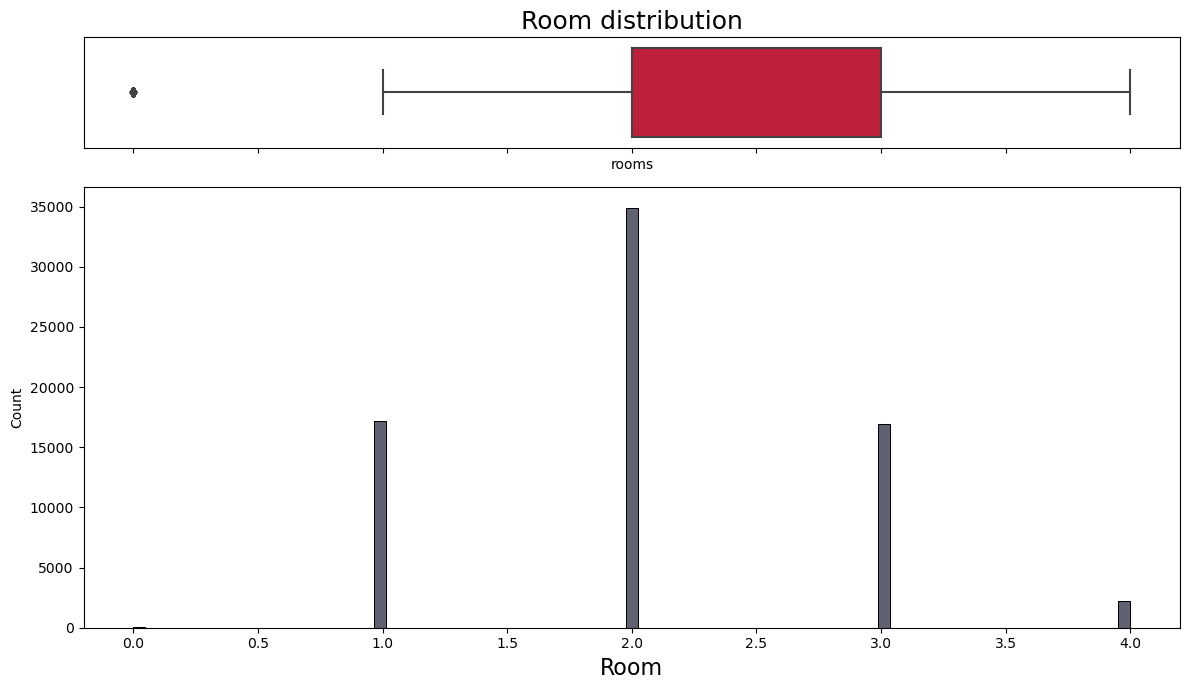

In [103]:
num_plots(df,'rooms','Room distribution','Room')

In [104]:
df['rooms'].value_counts(normalize=True)* 100

rooms
2    48.925666
1    24.068724
3    23.725105
4     3.148668
0     0.131837
Name: proportion, dtype: float64

* near 50 percentage of houses contain 2 rooms

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Parking</p>   


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


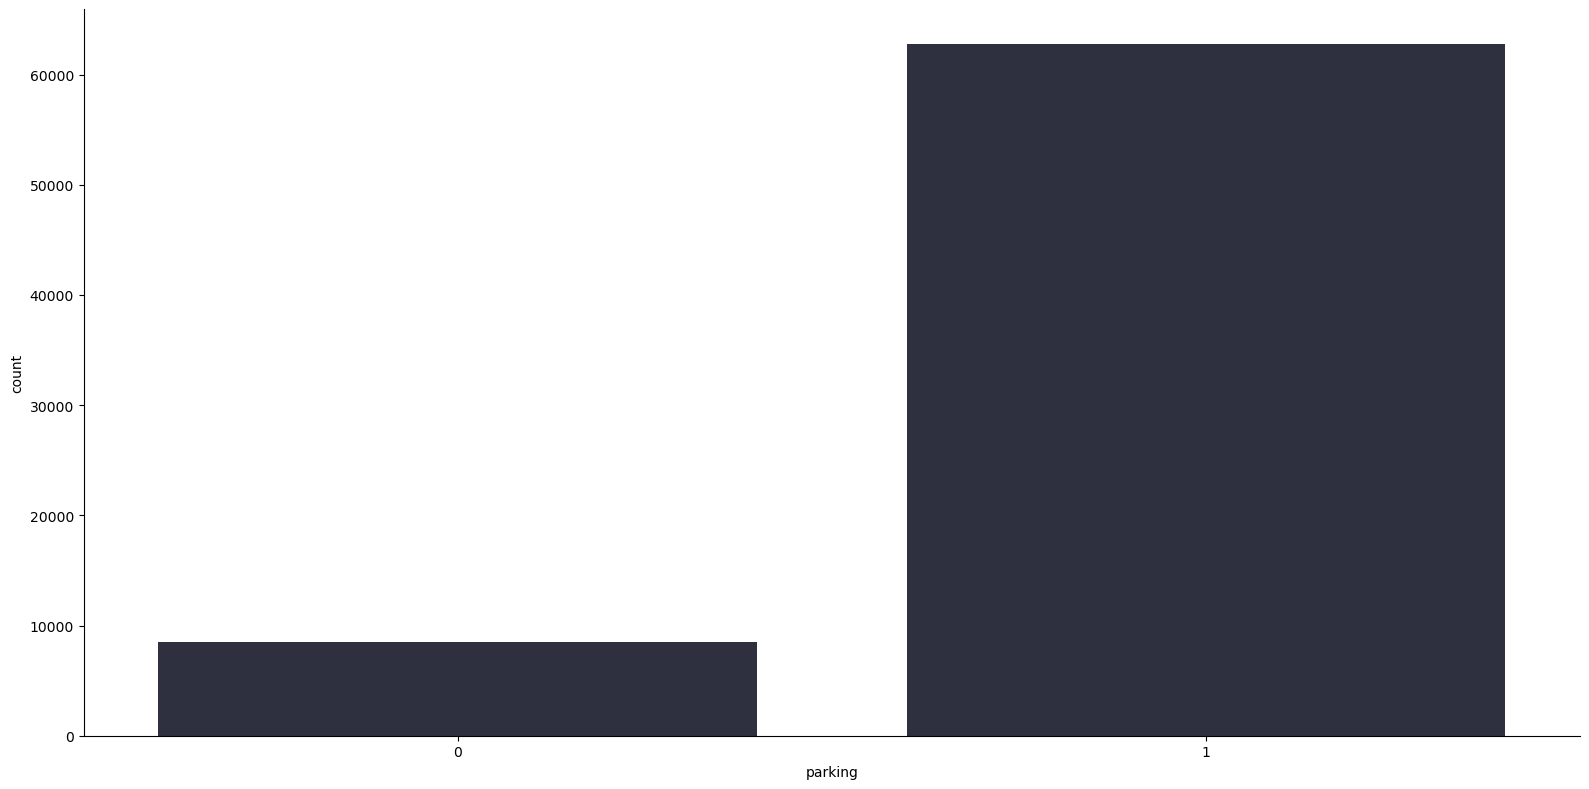

In [105]:
sns.catplot(x="parking", kind="count", data=df, height=8, aspect=2, color='#2b2d42')

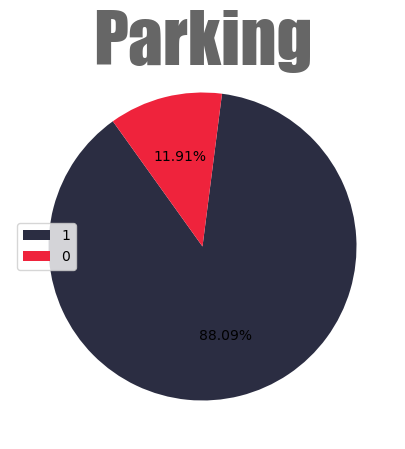

In [106]:
size =df.parking.value_counts().values
lbl=df.parking.value_counts().index
plt.figure(figsize=(6,5))
plt.title('Parking',fontname='Impact',fontsize=50,y=.95,alpha=0.6)
colors = ['#2b2d42','#ef233c','#8d99ae','#edf2f4']
plt.pie(size ,startangle=125.6,autopct='%1.2f%%', colors=colors)
plt.legend(labels=lbl,loc='center left')
plt.show()

In [107]:
df['parking'].value_counts(normalize=True)* 100

parking
1    88.089762
0    11.910238
Name: proportion, dtype: float64

* most houses are having parking

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Warehouse</p>

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


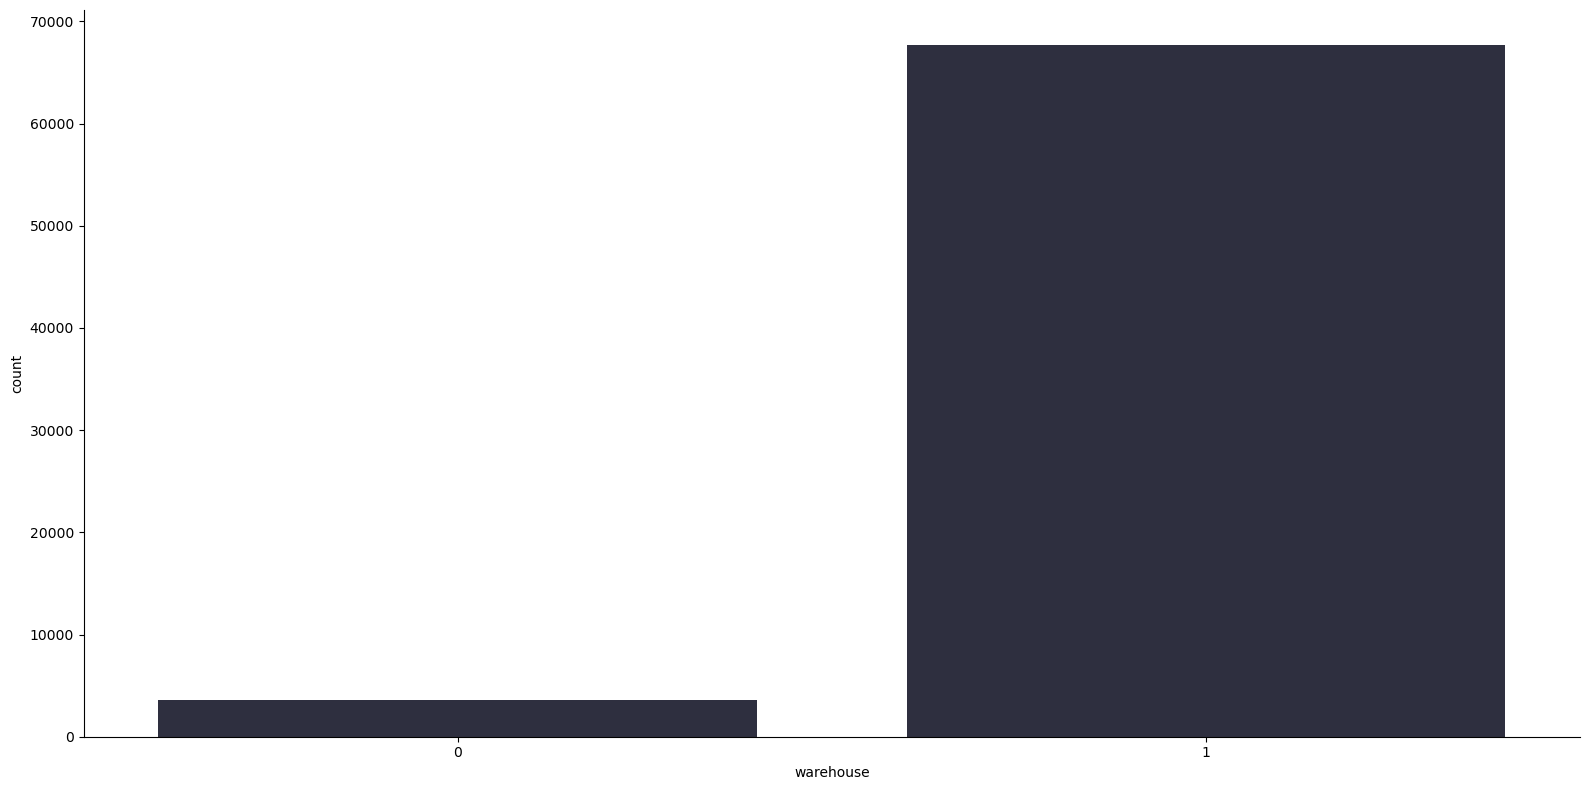

In [108]:
sns.catplot(x="warehouse", kind="count", data=df, height=8, aspect=2, color='#2b2d42')

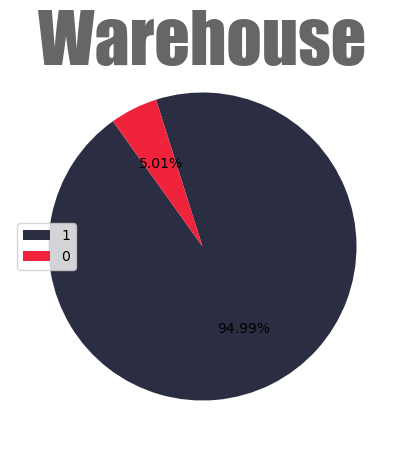

In [109]:
size =df.warehouse.value_counts().values
lbl=df.warehouse.value_counts().index
plt.figure(figsize=(6,5))
plt.title('Warehouse',fontname='Impact',fontsize=50,y=.95,alpha=0.6)
colors = ['#2b2d42','#ef233c','#8d99ae','#edf2f4']
plt.pie(size ,startangle=125.6,autopct='%1.2f%%', colors=colors)
plt.legend(labels=lbl,loc='center left')
plt.show()

* over 90% of houses in dataset have warehouse

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Elevator</p>

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


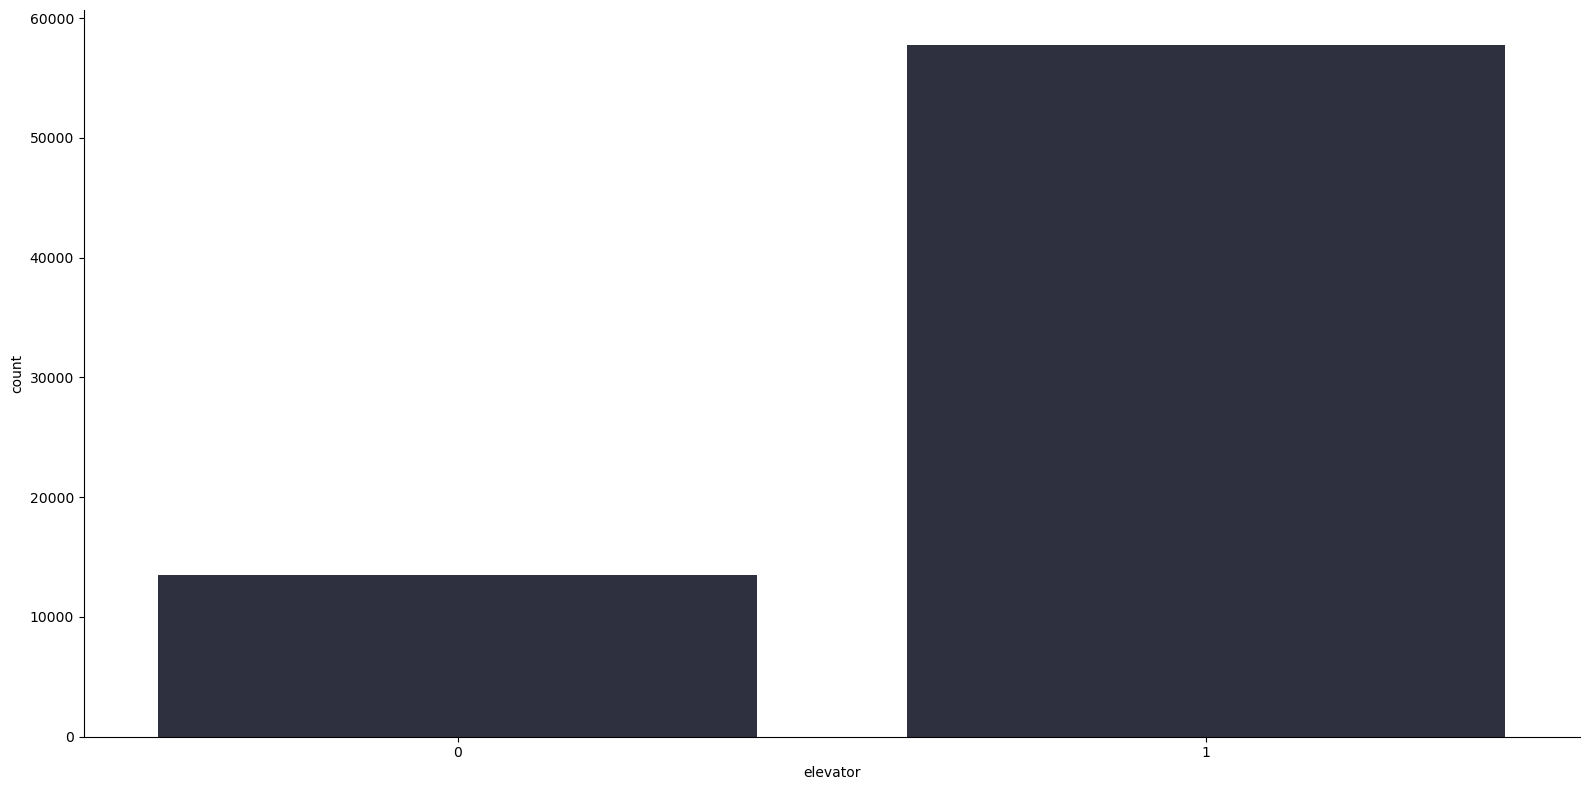

In [110]:
sns.catplot(x="elevator", kind="count", data=df, height=8, aspect=2, color='#2b2d42')

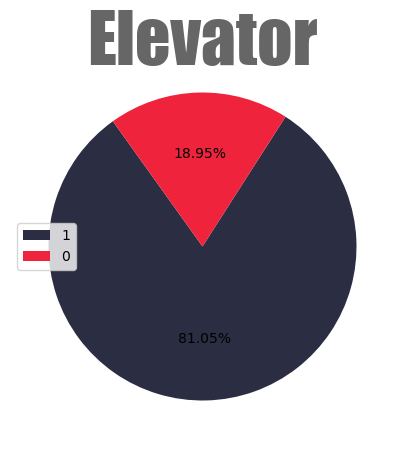

In [111]:
size =df.elevator.value_counts().values
lbl=df.elevator.value_counts().index
plt.figure(figsize=(6,5))
plt.title('Elevator',fontname='Impact',fontsize=50,y=.95,alpha=0.6)
colors = ['#2b2d42','#ef233c','#8d99ae','#edf2f4']
plt.pie(size ,startangle=125.6,autopct='%1.2f%%', colors=colors)
plt.legend(labels=lbl,loc='center left')
plt.show()

* over 80% of houses have elavator

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Neighborhood</p>

Text(0.5, 1.0, 'neighborhood')

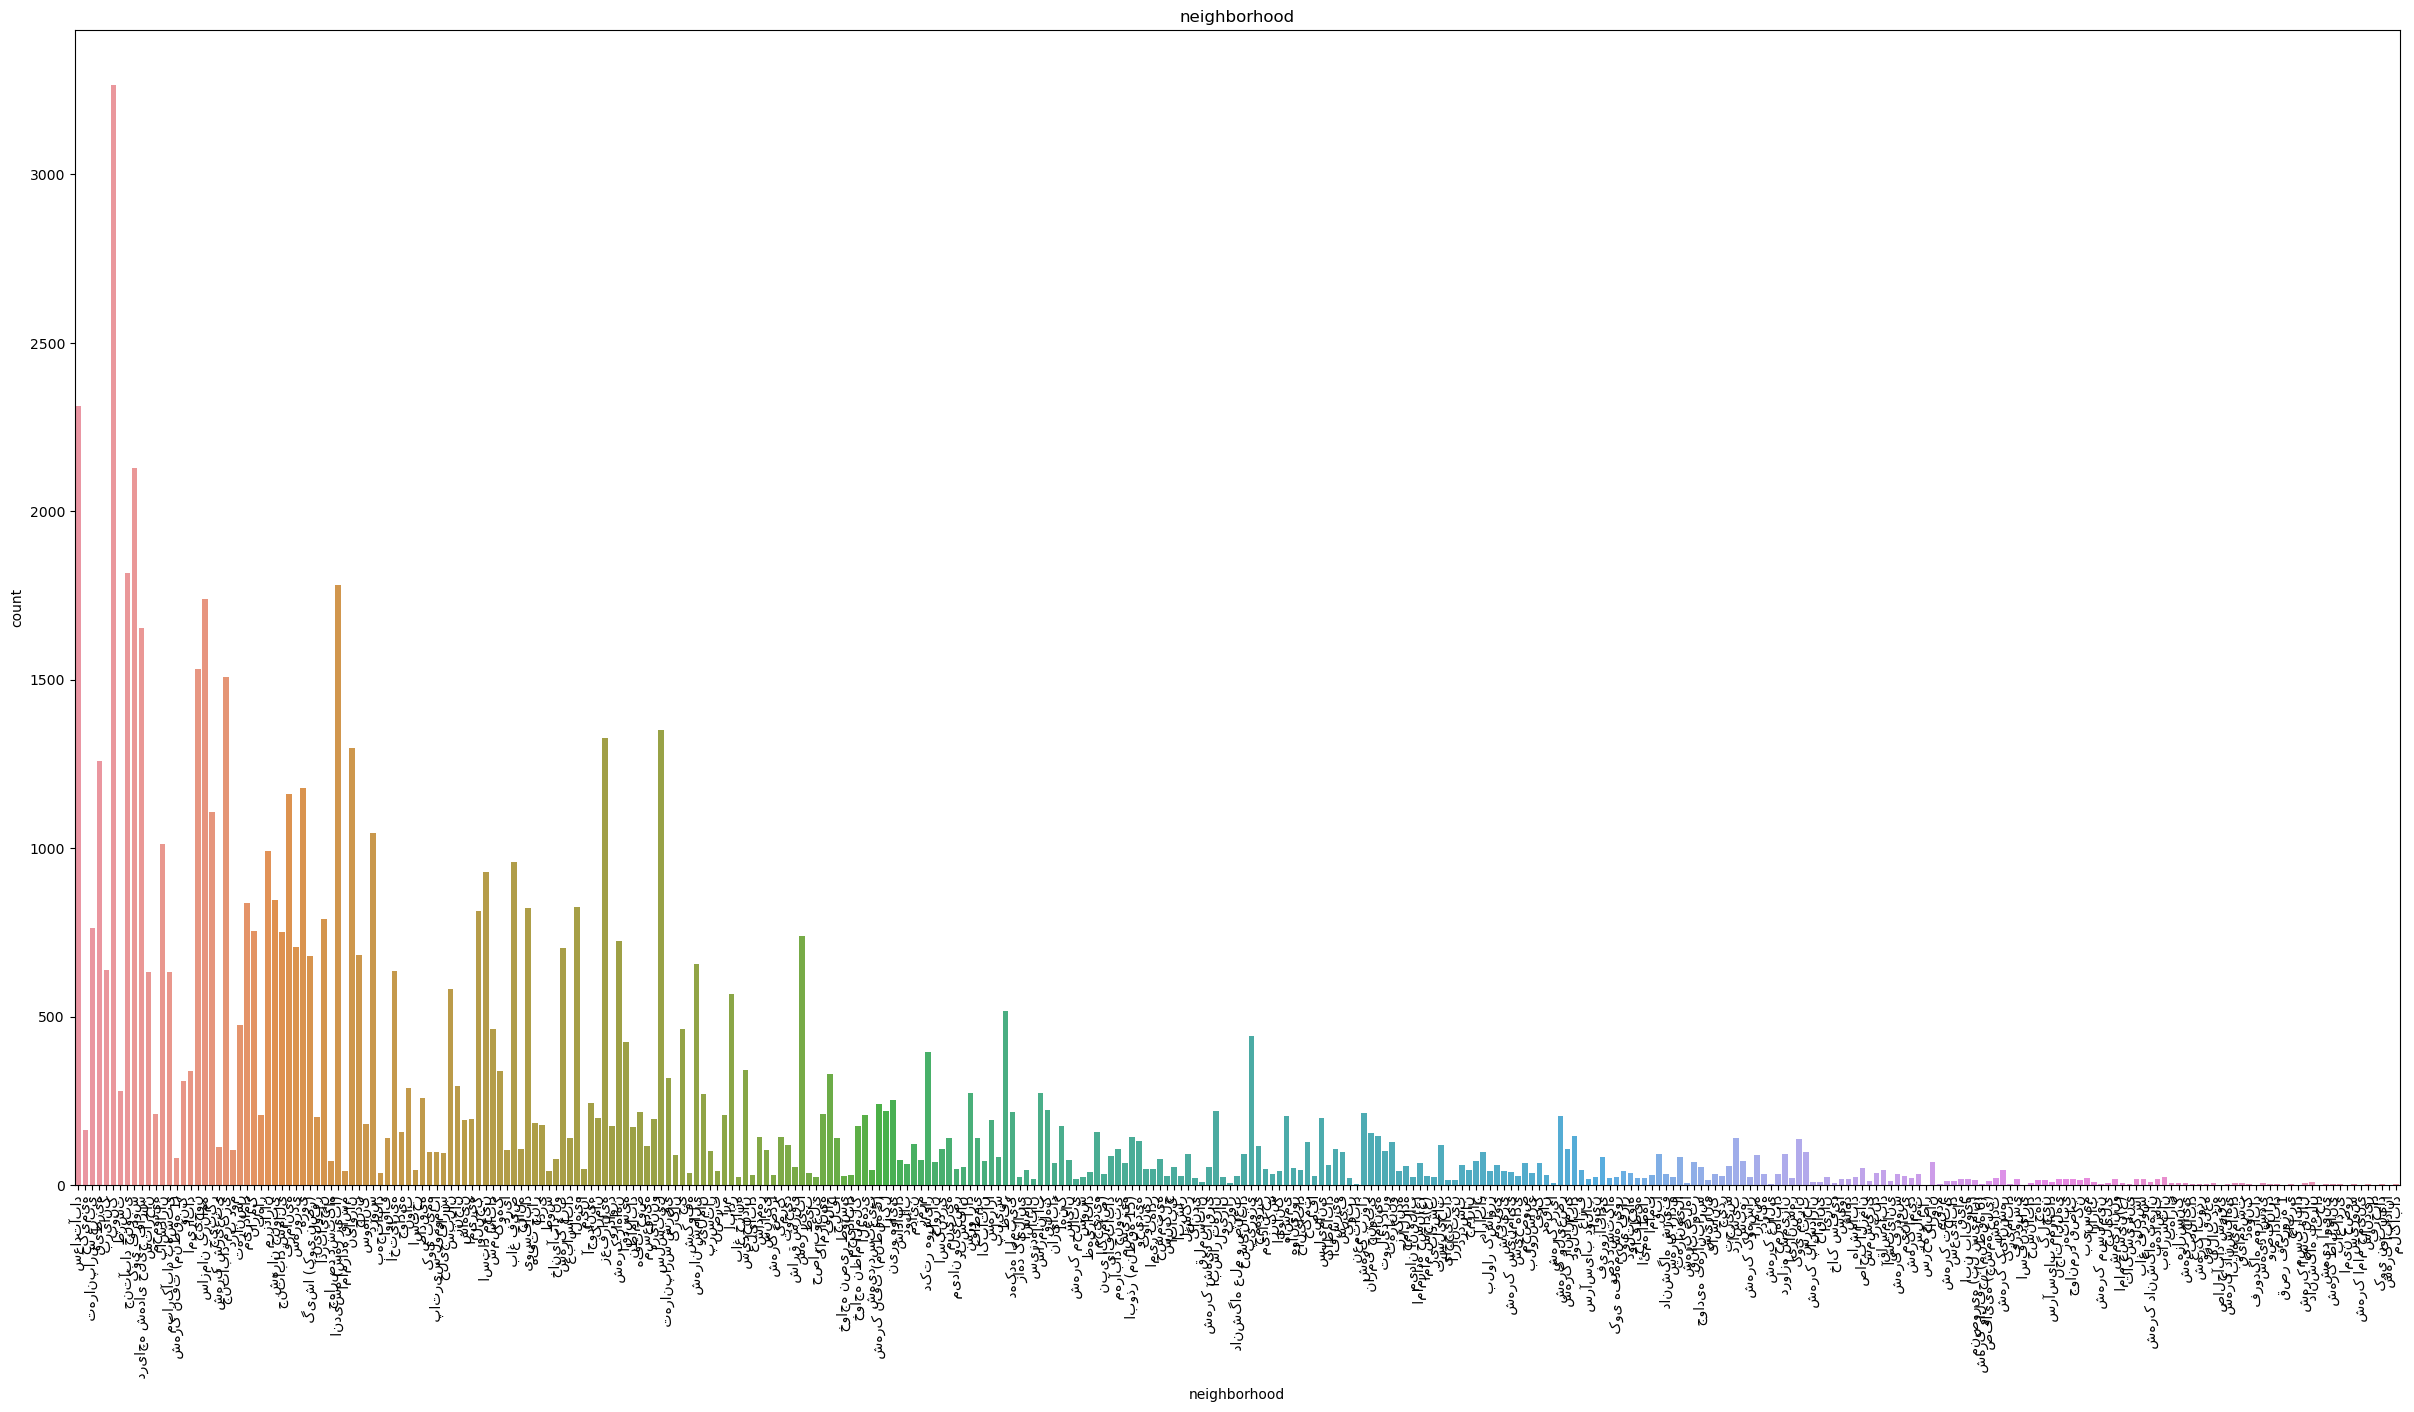

In [112]:
plt.figure(figsize=(30,15))
category_chart = sns.countplot(data=df, x='neighborhood')
plt.xticks(rotation=90)
category_chart.set_title('neighborhood')

In [113]:
pd.DataFrame(df['neighborhood'].value_counts())

,count
neighborhood,
پونک,3265
سعادت‌آباد,2313
کوی فردوس,2128
جنت‌آباد جنوبی,1816
اندیشه (شهر زیبا),1781
...,...
اسفندیاری,1
شهرک امام خمینی,1
فرحزاد,1


we see in the datasets that some neighborhoods too many low data rows so we came to conclusion that
#droping# them is best that we can

In [114]:
df_n = pd.DataFrame(df['neighborhood'].value_counts())

In [115]:
n_list = df_n[df_n['count'] < 10].index.tolist() # dropping all neighborhoods less then 10 rows

In [116]:
df.reset_index(inplace = True)

In [117]:
df = df.drop(columns= 'index')

In [118]:
df.shape[0]

71300

In [119]:
list_index_n = list()
for i in range(df.shape[0]):
    if df.iloc[i,0] in n_list:
        list_index_n.append(i)
df = df.drop(list_index_n)

In [120]:
pd.DataFrame(df['neighborhood'].value_counts())

,count
neighborhood,
پونک,3265
سعادت‌آباد,2313
کوی فردوس,2128
جنت‌آباد جنوبی,1816
اندیشه (شهر زیبا),1781
...,...
شهرک تختی,12
آرارات,10
خاقانی,10


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Area</p>

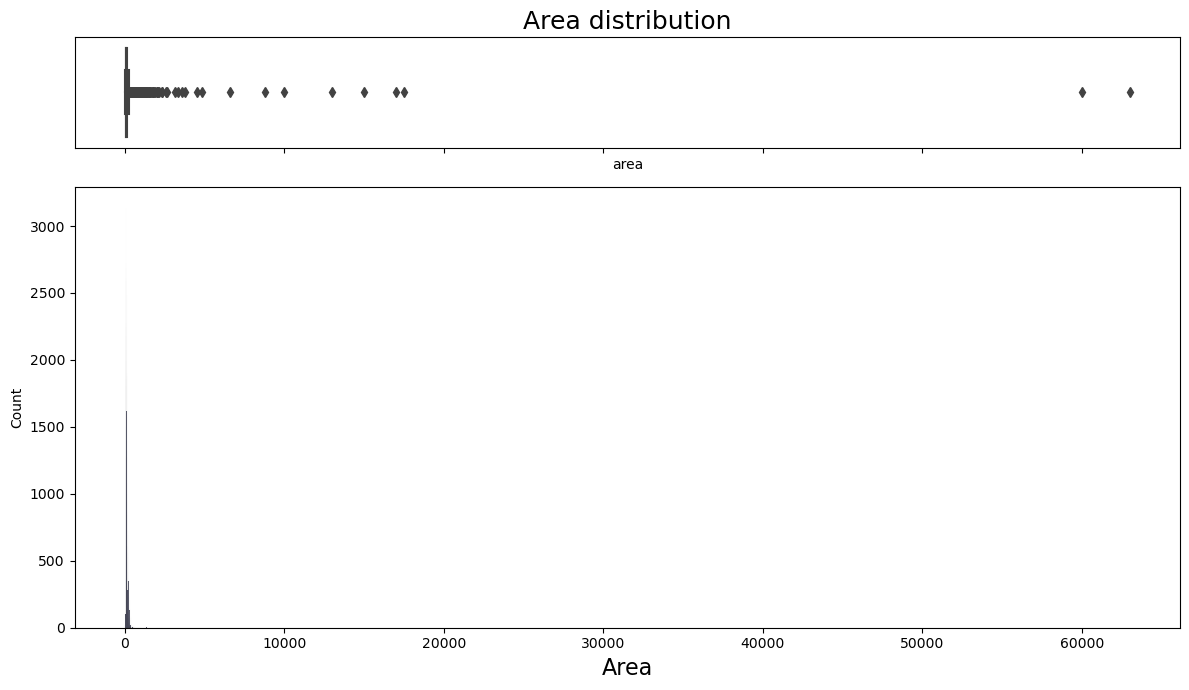

In [121]:
num_plots(df,'area','Area distribution','Area')

As you we have some biiig outliers. Let's drop them

In [122]:
df = df[df["area"]<300] # working with just under 300 m^2 houses would be better and more accurate

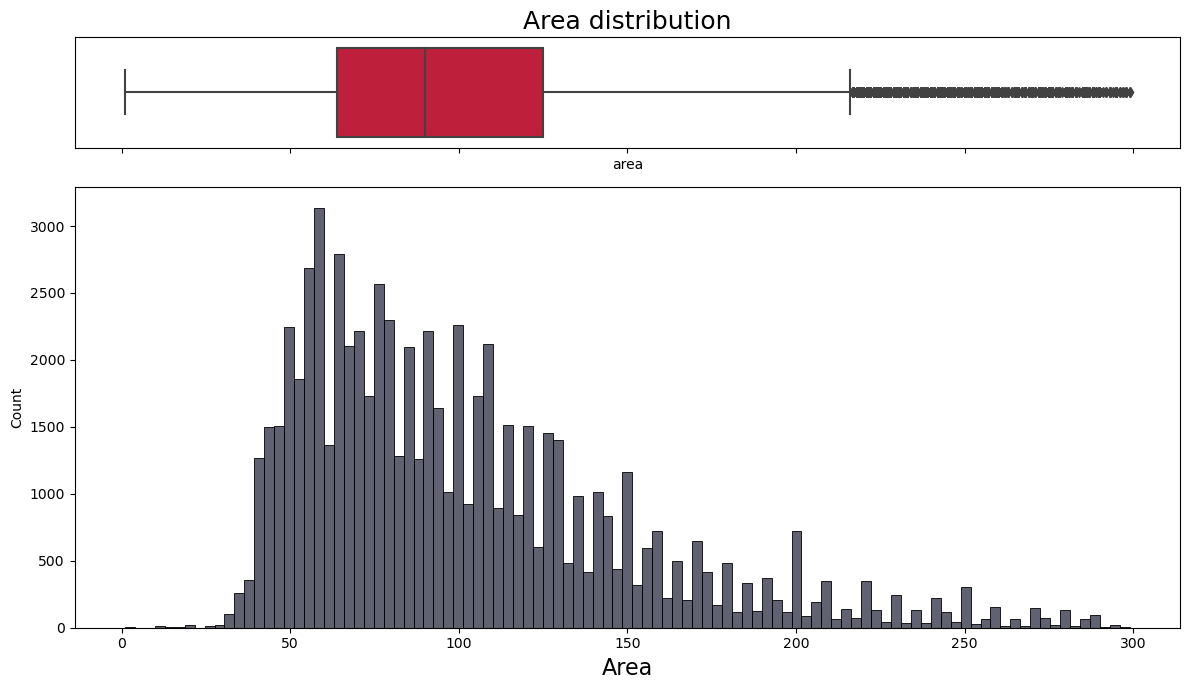

In [123]:
num_plots(df,'area','Area distribution','Area')

we better drop under 40 m^2 houses too

In [124]:
df = df[df["area"]>40]

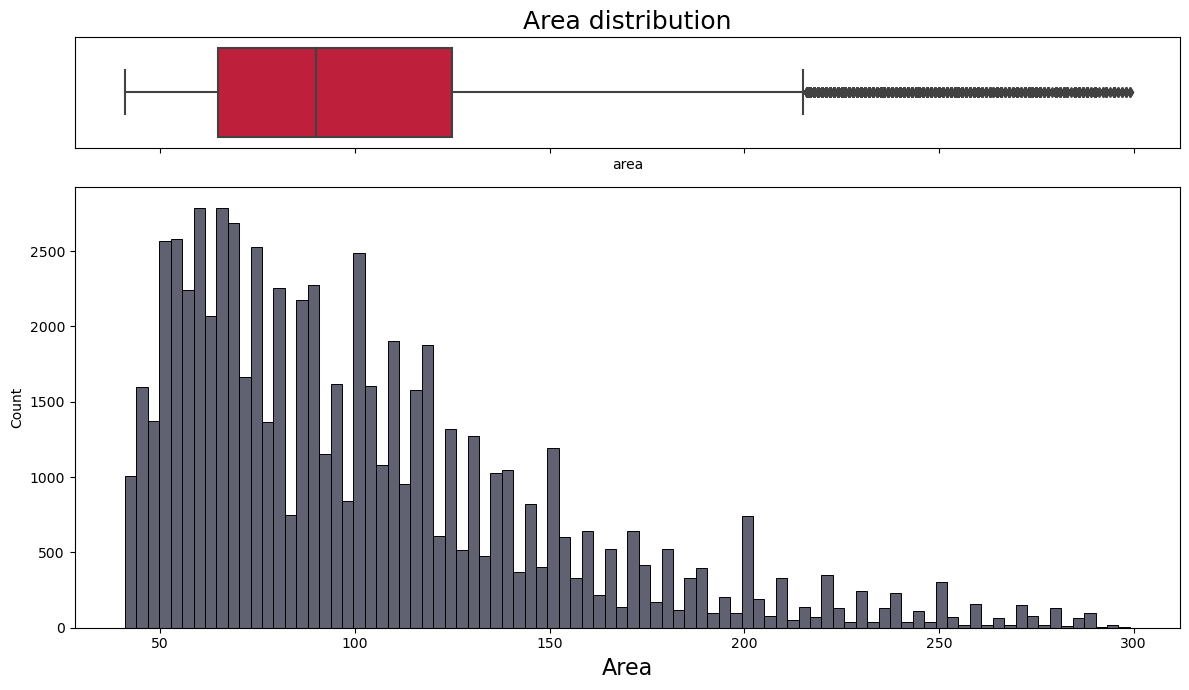

In [125]:
num_plots(df,'area','Area distribution','Area')

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Visualization</p>

<Axes: >

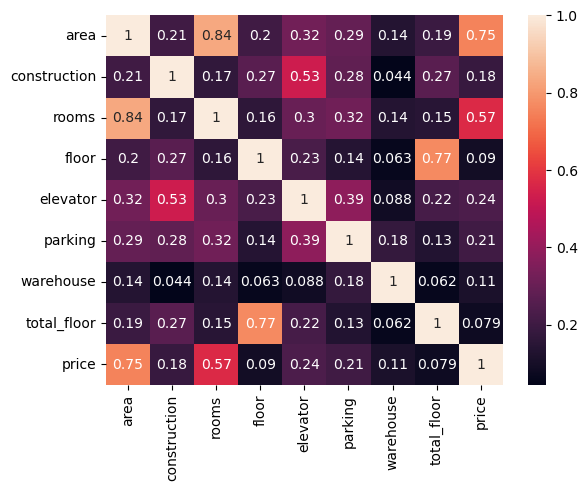

In [126]:
sns.heatmap(df.iloc[:,1:].corr() , annot=True)

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


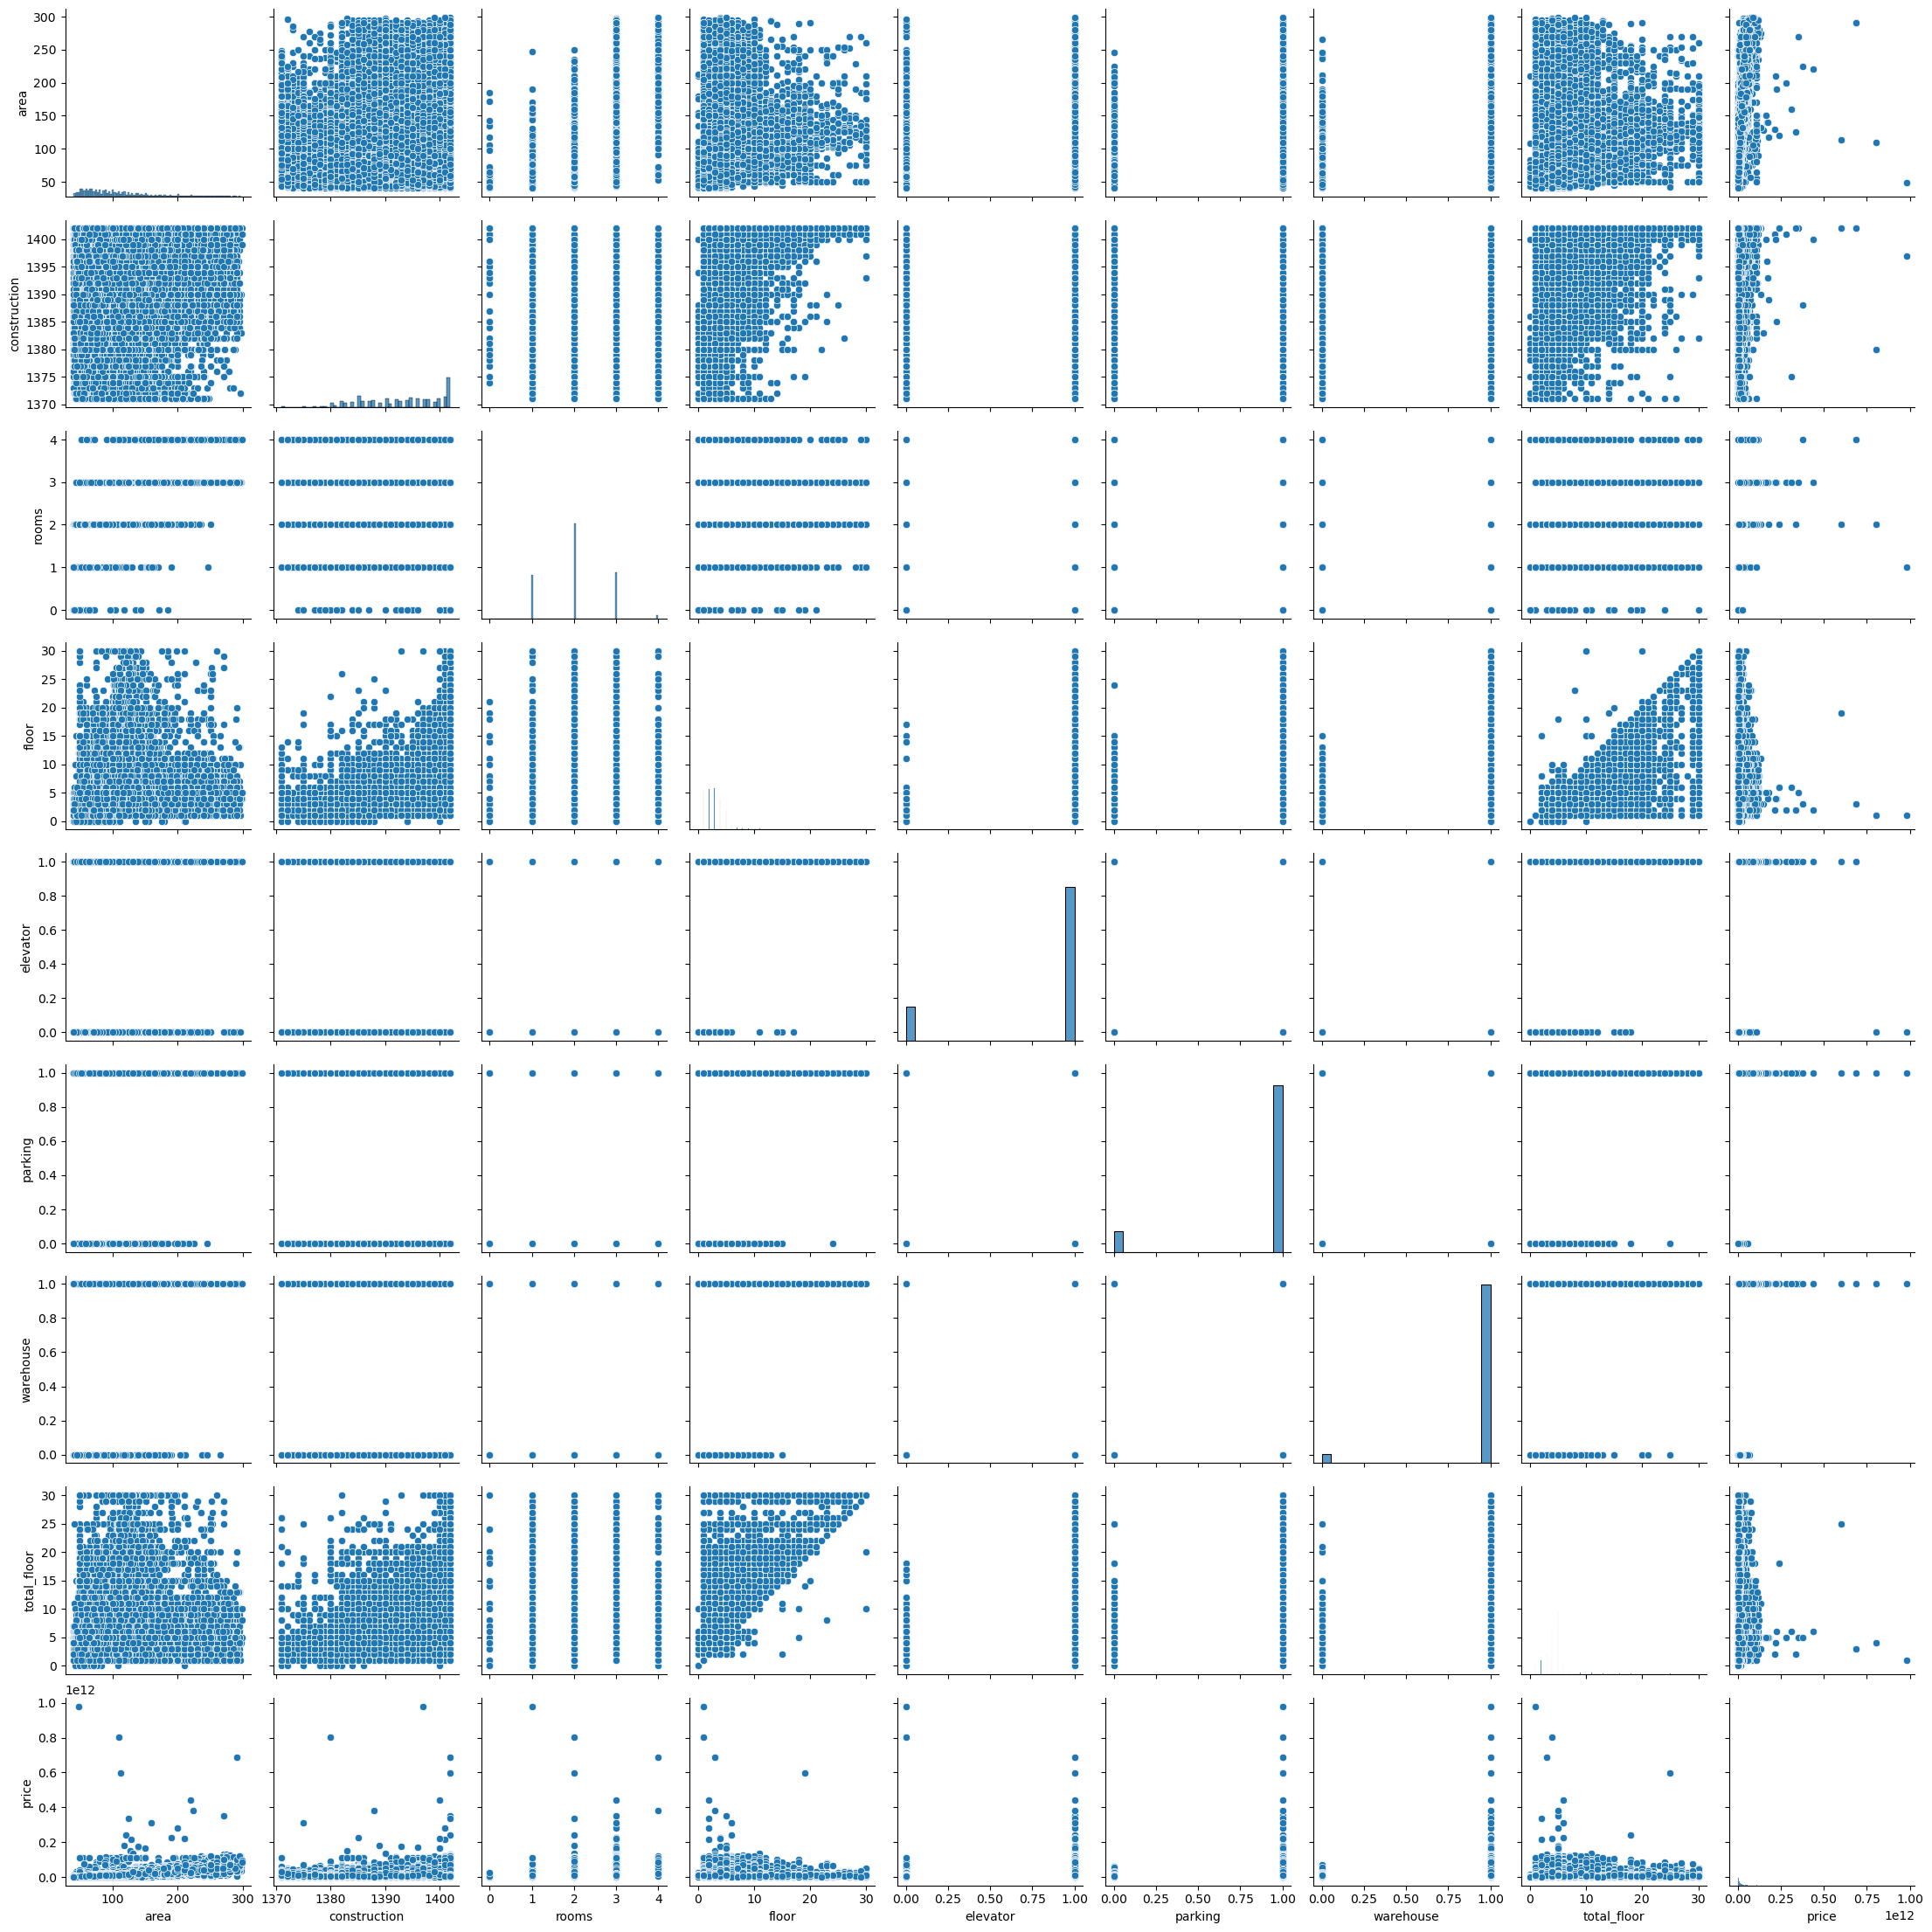

In [127]:
sns.pairplot(df.iloc[:,1:])

Text(0, 0.5, 'Price(usd)')

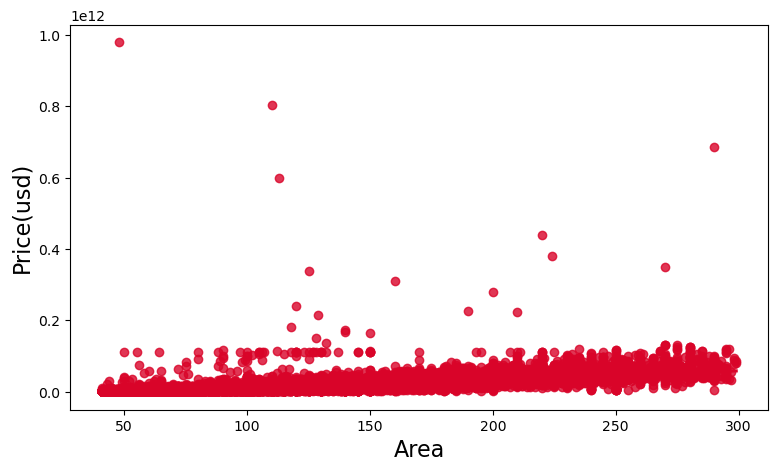

In [128]:
plt.figure(figsize=(9,5))


sns.regplot(x="area", y="price", data=df, color='#d90429')
plt.xlabel( 'Area', fontsize=16)
plt.ylabel( 'Price(usd)', fontsize=16)


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#ef233c;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 20px 50px;overflow:hidden;font-weight:500">Modeling</p>

In [129]:
df = pd.get_dummies(df, columns=['neighborhood'], dtype=int)

In [130]:
X = df.drop(columns=['price'])
Y = df[['price']]

X = sm.add_constant(X)
model_OLS = sm.OLS(Y ,X).fit()
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     443.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:53:21   Log-Likelihood:            -1.6661e+06
No. Observations:               68486   AIC:                         3.333e+06
Df Residuals:                   68198   BIC:                         3.335e+06
Df Model:                         287                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


at first try we get 65% R-squared. let's do some more cleaning.

#### at Area-Price chart we see some so big numbers for price. we shoud drop them too

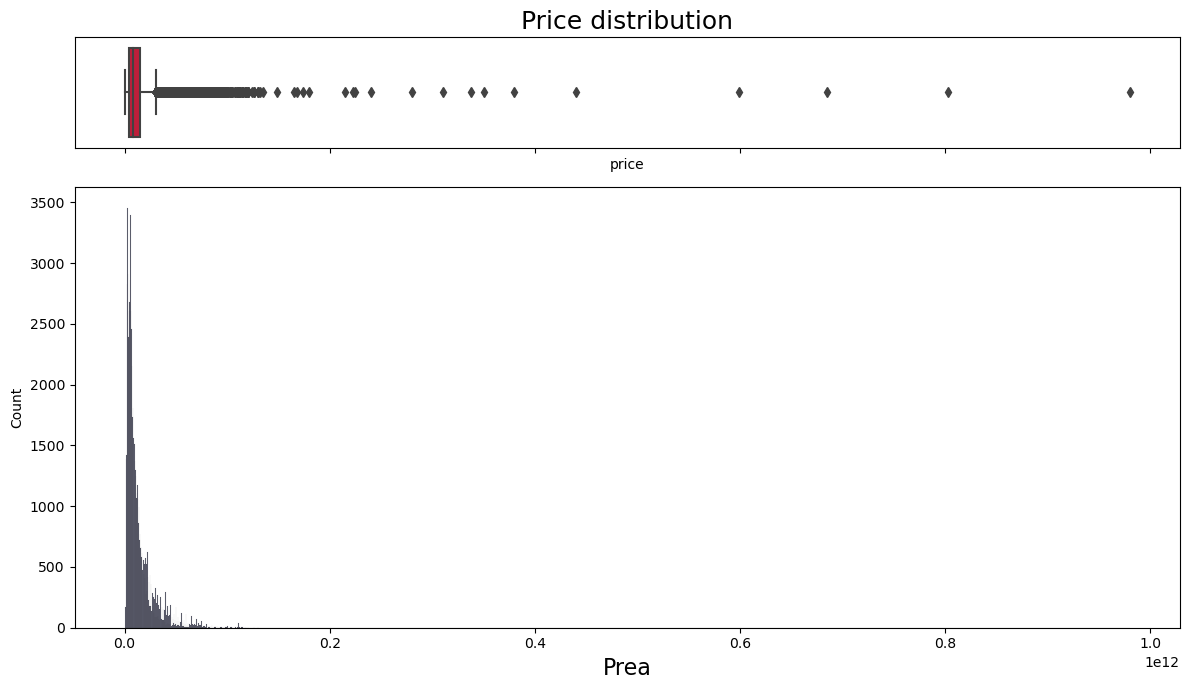

In [131]:
num_plots(df,'price','Price distribution','Prea')

In [132]:
df.price.max()

980000000000

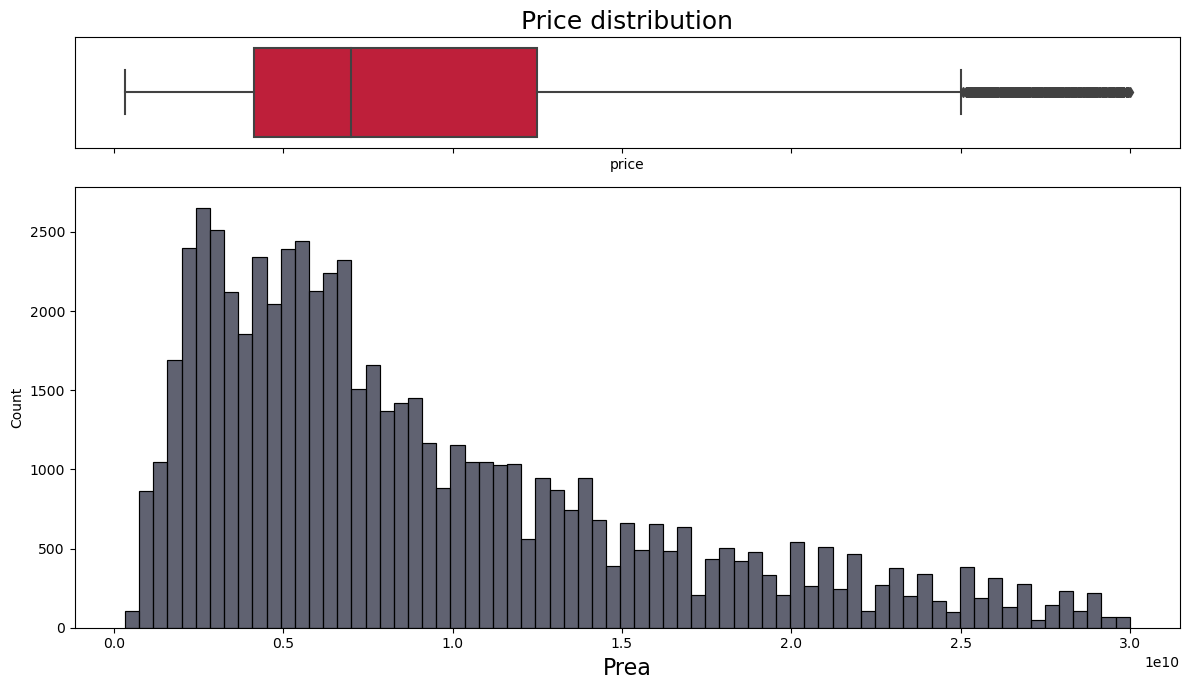

In [133]:
num_plots(df[df['price']<30000000000 ],'price','Price distribution','Prea') # lower then 30.000.000.000

In [134]:
df = df[df['price']<30000000000 ] # lower then 30.000.000.000

Text(0, 0.5, 'Price')

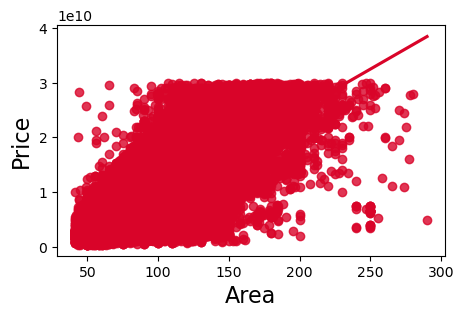

In [135]:
plt.figure(figsize=(5,3))


sns.regplot(x="area", y="price", data=df, color='#d90429')
plt.xlabel( 'Area', fontsize=16)
plt.ylabel( 'Price', fontsize=16)


In [136]:
X = df.drop(columns=['price'])
Y = df[['price']]

X = sm.add_constant(X)
model_OLS = sm.OLS(Y ,X).fit()
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1605.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:53:38   Log-Likelihood:            -1.4303e+06
No. Observations:               62310   AIC:                         2.861e+06
Df Residuals:                   62022   BIC:                         2.864e+06
Df Model:                         287                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [137]:
y_pre = model_OLS.predict(X)

In [138]:
error = (y_pre - Y.T).T

<Axes: xlabel='price', ylabel='Count'>

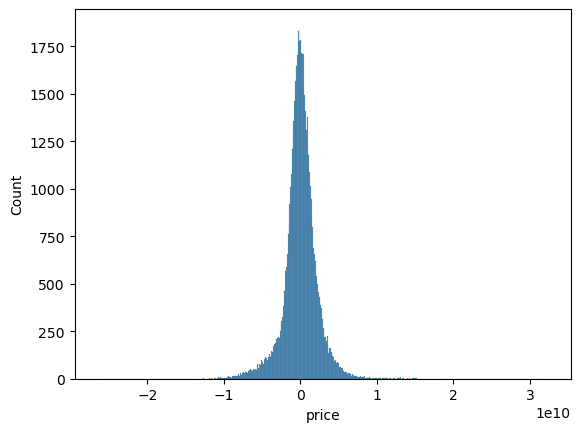

In [139]:
sns.histplot(error, x = "price")

In [140]:
dg.het_goldfeldquandt (Y, X, drop = 0.20)

(0.933892561316792, 0.9999999048539863, 'increasing')

Now it's time to check the VIF of Xk 

In [141]:
counter = 1
for i in X.columns:
    if i == 'const':
        continue
    elif counter == 9:
        break
    else:
        X_target = X[[i]]
        X_dep = X.drop(columns= i)
        res = sm.OLS(X_target ,X_dep).fit()
        VIF = 1/ (1 - res.rsquared)
        print("VIF for {} is".format(i), VIF)
    counter += 1

VIF for area is 4.128998802061598
VIF for construction is 1.7598139365503878
VIF for rooms is 3.3785516650965617
VIF for floor is 2.65389931481103
VIF for elevator is 1.7842516544537854
VIF for parking is 1.410196119335032
VIF for warehouse is 1.1493990928611033
VIF for total_floor is 3.0183654445269483


#### none of them are above 10
#### -----------------------------------------------------------------------------------

Now let's do some more of modeling.

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

In [326]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [327]:
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [329]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

print('R^2 for train:', r2_score(y_train, y_pred_train))
print('R^2 for test:', r2_score(y_test, y_pred_test))

R^2 for train: 0.9850846488179376
R^2 for test: 0.8962001981885758


##                               --------------------------         the end           ----------------------------------